In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [2]:
import h5py
from pycbc import conversions

In [3]:
f = h5py.File('/work/yifan.wang/search-high-spin//prod3-fixsub/runs/O3b/0/bank/H1L1V1-BANK2HDF-1253977218-3144122.hdf','r')

In [4]:
four = h5py.File('/work/yifan.wang/search-high-spin/notebook/bankstudies/4ogcbank/combinedbbh.hdf','r')

In [5]:
fourmc = conversions.mchirp_from_mass1_mass2(four['mass1'][:],four['mass2'][:])
fourchi = conversions.chi_eff(four['mass1'][:],four['mass2'][:],four['spin1z'][:],four['spin2z'][:])

In [6]:
mc = conversions.mchirp_from_mass1_mass2(f['mass1'][:],f['mass2'][:])

In [7]:
chieff = conversions.chi_eff(f['mass1'][:],f['mass2'][:],f['spin1z'][:],f['spin2z'][:])

In [8]:
def mc_chieff_from_m1(m1):
    mc = conversions.mchirp_from_mass1_mass2(m1,1)
    chieff = conversions.chi_eff(m1,1,0.95,0.05)
    return mc,chieff

def minus_mc_chieff_from_m1(m1):
    mc = conversions.mchirp_from_mass1_mass2(m1,1)
    chieff = conversions.chi_eff(m1,1,-0.95,-0.05)
    return mc,chieff

In [9]:
m1 = np.linspace(1,15,10000)
dash_m,dash_chi = mc_chieff_from_m1(m1)
dash_mim,dash_michi = minus_mc_chieff_from_m1(m1)

sm = conversions.mchirp_from_mass1_mass2(1,2)
bo = np.where(dash_m>=sm)
dash_m = dash_m[bo]
dash_chi = dash_chi[bo]
dash_mim = dash_mim[bo]
dash_michi = dash_michi[bo]

In [10]:
np.min(dash_m)

1.2170409547371897

In [11]:
sm

1.2167286837864115

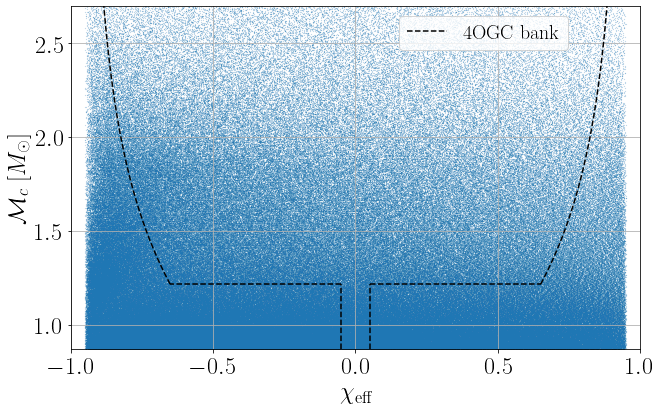

In [13]:
plt.scatter(chieff,mc,s=0.01)
#plt.scatter(fourchi,fourmc,s=0.01)
plt.plot(dash_chi,dash_m,'--',color='black')
plt.plot(dash_michi,dash_mim,'--',color='black')

mclow = conversions.mchirp_from_mass1_mass2(1,1)
mchigh = conversions.mchirp_from_mass1_mass2(5,2)

#plt.axvline(x=0.05,ymin=mclow,ymax=mchigh,ls='--',color='black')
#plt.axvline(-0.05,mclow,sm,ls='--',color='black')
plt.plot([0.05,0.05],[mclow,sm],ls='--',color='black')
plt.plot([-0.05,-0.05],[mclow,sm],ls='--',color='black')

plt.plot([0.05,np.min(dash_chi)],[sm,sm],ls='--',color='black',label='4OGC bank')
plt.plot([-0.05,np.max(dash_michi)],[sm,sm],ls='--',color='black')

plt.xlabel('$\chi_\mathrm{eff}$')
plt.ylabel('$\mathcal{M}_c~[M_\odot]$')
plt.xlim(-1,1)
plt.ylim(mclow,mchigh)
plt.legend(loc="upper right",bbox_to_anchor=(0.89, 1))
plt.savefig('bank.png',bbox_inches='tight')